### **Numbers of signatures needed for a complete attack**
--------------

##### **Libraries**
--------------

In [1]:
import matplotlib.pyplot as plt
import numpy as np

##### **Code**
--------------

In [2]:
# Numbers of coefficients 
n = 256

# Module used in Dilithium 
q = 8380417

In [3]:
# Dilithium mode options 2, 3 and 5
mode = 2

if mode == 2:
    k = 4
    gamma2 = (q -1)//88
else:
    gamma2 = (q - 1)//32
    if mode == 3:
        k = 6
    else:
        k = 8

In [4]:
def probability(T, N = k*n):
    """
    T(int):  number of repetitions
    N(int):  number of coefficients considered for Dilithium
             default k*n (all the coeffs.)
    outputs: probability to have over T signatures the N coordinates = 0 at least once 
    """
    p = pow(1 - 1/(2*gamma2), T)
    return pow(1 - p, N)

def get_proba_sup_bound(proba, N = k*n):
    """
    proba(int): minimal selected probability
    N(int):     number of coefficients considered for Dilithium
                default k*n (all the coeffs.)
    outputs:    Number of experiences to acheive the bound  
    """
    T = 0
    while( probability(T, N) < proba):
        T += 1
    return T

In [5]:
# Number of signatures needed to get the N coordinates = 0 at least once with a probability equal to 1 
signatures1 = get_proba_sup_bound(1)
print("Signatures Needed (proba = 1)     = ", signatures1)

# Number of signatures needed to get the N coordinates = 0 at least once with a probability equal to 0.997 
signatures2 = get_proba_sup_bound(0.997)
print("Signatures Needed (proba = 0.997) = ", signatures2)

Signatures Needed (proba = 1)     =  7129039
Signatures Needed (proba = 0.997) =  2426337


In [6]:
total_nb_signatures = 10000000

liste_of_probas = [probability(T) for T in range(total_nb_signatures)]

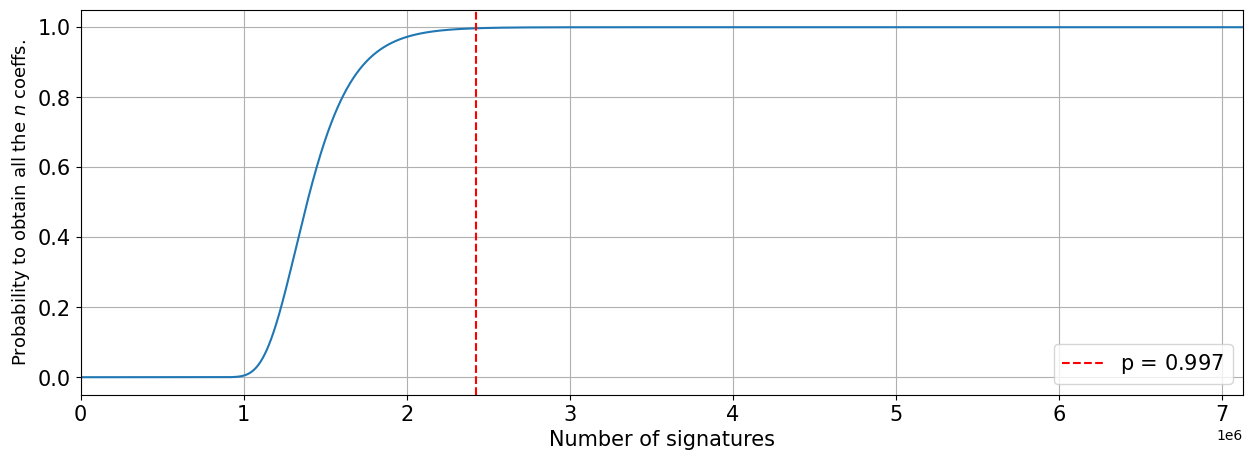

In [7]:
fg, ax = plt.subplots(figsize=(15, 5))
ax.plot(range(total_nb_signatures), liste_of_probas)
plt.xlim(0, signatures1)
ax.grid()
ax.set_xlabel("Number of signatures", fontsize = 15)
ax.set_ylabel("Probability to obtain all the $n$ coeffs.", fontsize = 13)
ax.axvline(signatures2, color = "r",  linestyle = 'dashed', label = r"p = $0.997$")
ax.tick_params(axis='both', which='major', labelsize = 15)
ax.legend(loc = "lower right", prop={'size': 15})
plt.show()